### Import data frame

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

from PIL import Image

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
plt.style.use('dark_background')


df_training = pd.read_csv("optdigits_training.csv", header=None)
df_testing = pd.read_csv("optdigits_testing.csv", header=None)

# adding colomn name
columns_name = [
    "x_"+ str(col)
    for col in range(1, len(df_training.columns))
]
columns_name.append('out')
df_training.columns = columns_name
df_testing.columns = columns_name

df_training.head(10)
df_testing.head(10)

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,out
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
5,0,0,12,10,0,0,0,0,0,0,...,0,0,0,9,16,16,10,0,0,5
6,0,0,0,12,13,0,0,0,0,0,...,0,0,0,1,9,15,11,3,0,6
7,0,0,7,8,13,16,15,1,0,0,...,0,0,0,13,5,0,0,0,0,7
8,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
9,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9


<Figure size 1728x720 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

(-0.5, 7.5, 7.5, -0.5)

Text(0.5, 1.0, 'Training: 7\n')

<AxesSubplot:>

(-0.5, 7.5, 7.5, -0.5)

Text(0.5, 1.0, 'Training: 8\n')

<AxesSubplot:>

(-0.5, 7.5, 7.5, -0.5)

Text(0.5, 1.0, 'Training: 9\n')

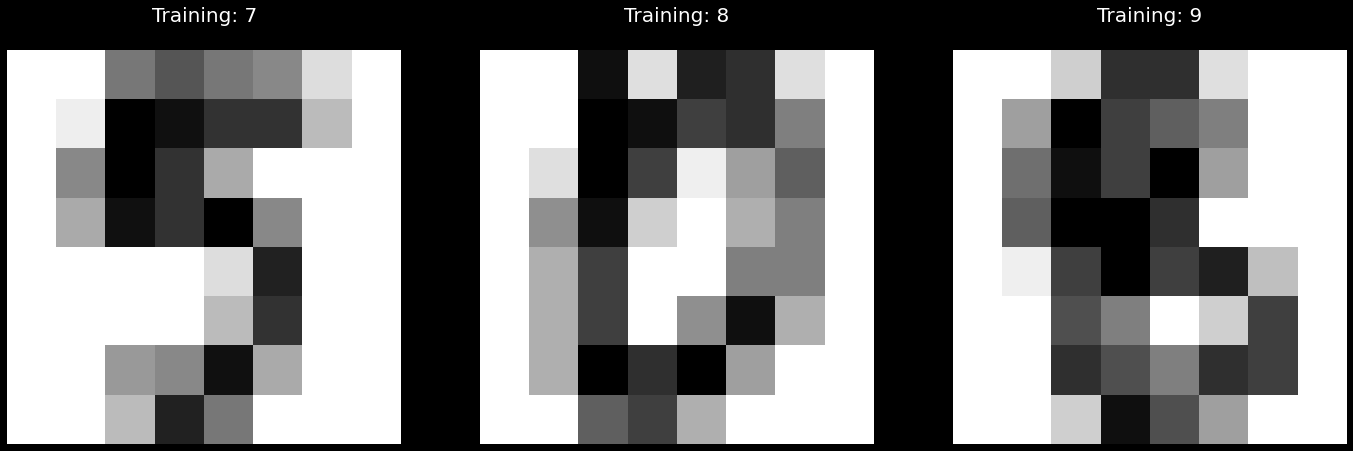

,out
7,5
8,0
9,8


In [2]:
# display 8x8 image (excluding the last value (x_65)) for dataset[7,8,9]
plt.figure(figsize=(24,10))
plt.axis('off')
for ind in range(7,10):
    plt.subplot(1, 3, ind-6)
    some_digit = df_training.iloc[[ind], [i for i in range(64)]]
    image = some_digit.values.reshape(8, 8)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis('off')
    plt.title( 'Training: %i\n' % ind, fontsize=20)
plt.show()
df_training.iloc[[7,8,9], [64]]

### PART D
Find the performance of binary classifiers (KNN, Logistic Regression, LDA,
QDA) using two classes: 5 and not-5.

#### Creating models for KNN, Logistic Regression, LDA, and QDA

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

x_train = df_training.iloc[[i for i in range(3823)], [i for i in range(64)]]
y_train = df_training["out"]

x_test = df_testing.iloc[[i for i in range(1797)], [i for i in range(64)]]
y_test = df_testing["out"]

y_train_is_5 = (y_train == 5)
y_test_is_5 = (y_test == 5)
# y_multilabel = np.c_[y_train_5]

In [4]:
# KNN models
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(x_train, y_train_is_5)

# Logistic Regression models
lr_clf = skl_lm.LogisticRegression(solver='newton-cg')
lr_clf.fit(x_train, y_train_is_5)

# LDA models
lda_clf = LinearDiscriminantAnalysis(solver='svd')
lda_clf.fit(x_train, y_train_is_5)

#QDA models
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(x_train, y_train_is_5)

KNeighborsClassifier(n_neighbors=7)

LogisticRegression(solver='newton-cg')

LinearDiscriminantAnalysis()

c:\users\duycu\jupyter notebook\ee 257 jupyter notebook\projects\project_env\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

#### Performance metrics for all 4 models

In [5]:
# # testing dataset if KNN returns correct prediction
# print('[y_train_5, y_train_not5]')
# knn_clf.predict(df_training.iloc[[7], [i for i in range(64)]])
# knn_clf.predict(df_training.iloc[[8], [i for i in range(64)]])
# knn_clf.predict(df_training.iloc[[9], [i for i in range(64)]])
# df_training.iloc[[7,8,9], [64]]

print('Score for predicting drawing is a "5"\n')
print('KNN-5 score:\t\t\t %f\n' % knn_clf.score(x_test, y_test_is_5))
print('Linear Regression score:\t %f\n' % lr_clf.score(x_test, y_test_is_5))
print('LDA score:\t\t\t %f\n' % lda_clf.score(x_test, y_test_is_5))
print('QDA score:\t\t\t %f\n' % qda_clf.score(x_test, y_test_is_5))

Score for predicting drawing is a "5"

KNN-5 score:			 0.997218

Linear Regression score:	 0.983862

LDA score:			 0.991653

QDA score:			 0.567613



### PART E
It seems KNN-5 give the best prediciting the drawing is a '5'. QDA perform the worst, almost the same as 50/50 guess.

### PART F
Find the performance of classifiers (KNN, Logistic Regression + OVR, LDA,
QDA) using all the classes.

In [6]:
from sklearn.multiclass import OneVsRestClassifier

# KNN models
knn_all10_clf = KNeighborsClassifier(n_neighbors=7)
knn_all10_clf.fit(x_train, y_train)

# Logistic Regression (One Over Rest) models
lr_all10_clf = skl_lm.LogisticRegression(solver='liblinear')
lr_OVR_all10_clf = OneVsRestClassifier(lr_all10_clf)
lr_OVR_all10_clf.fit(x_train, y_train)

# LDA models
lda_all10_clf = LinearDiscriminantAnalysis(solver='svd')
lda_all10_clf.fit(x_train, y_train)

#QDA models
qda_all10_clf = QuadraticDiscriminantAnalysis()
qda_all10_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

LinearDiscriminantAnalysis()

c:\users\duycu\jupyter notebook\ee 257 jupyter notebook\projects\project_env\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [7]:
print('Score for predicting drawing for all 9 digits\n')
print('KNN-5 score:\t\t\t %f\n' % knn_all10_clf.score(x_test, y_test))
print('Linear Regression (OVR) score:\t %f\n' % lr_OVR_all10_clf.score(x_test, y_test))
print('LDA score:\t\t\t %f\n' % lda_all10_clf.score(x_test, y_test))
print('QDA score:\t\t\t %f\n' % qda_all10_clf.score(x_test, y_test))

Score for predicting drawing for all 9 digits

KNN-5 score:			 0.976628

Linear Regression (OVR) score:	 0.947134

LDA score:			 0.938787

QDA score:			 0.757930

